In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow
import keras

In [2]:
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [3]:
#Data for features
X = nutrition.iloc[:, 6:]
y = nutrition.iloc[:, 4]


In [4]:
X

,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,0.3482,0.1441,56.7,0.001209,0.000706,290,11.50,2.17,44.54,22.02,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,0.3482,0.1441,56.7,0.001209,0.000706,238,2.15,10.66,43.91,5.00,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,0.3482,0.1441,56.7,0.001209,0.000706,250,1.53,10.20,48.89,6.12,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [5]:
y

1       0.264550
2       0.264550
5       0.560000
9       0.118750
10      0.355556
          ...   
1218    1.058824
1219    0.250000
1220    0.750000
1221    0.041000
1222    0.171429
Name: Price per Weight (£/100Gram), Length: 1042, dtype: float64

In [6]:
# command/
#only normalising X not y. Is this right?
# norm_X = preprocessing.normalize(X, axis=0) #collum instead of row
# norm_X = pd.DataFrame(norm_X, columns = X.columns)
# X=norm_X
# X

In [7]:
y = np.ravel(y)
X = X.values

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [9]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Feature Scaling/preprocessing - normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(8, activation = 'relu', input_dim = 45))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))

#avoids overfitting
#https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(0.1))


# Adding the output layer

model.add(Dense(units = 1))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mse'])

# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
84/84 [==============================] - 1s 765us/step - loss: 143.0537 - mse: 143.0537
Epoch 2/100
84/84 [==============================] - 0s 632us/step - loss: 34.6006 - mse: 34.6006
Epoch 3/100
84/84 [==============================] - 0s 591us/step - loss: 84.9611 - mse: 84.9611
Epoch 4/100
84/84 [==============================] - 0s 588us/step - loss: 50.6914 - mse: 50.6914
Epoch 5/100
84/84 [==============================] - 0s 623us/step - loss: 93.6605 - mse: 93.6605
Epoch 6/100
84/84 [==============================] - 0s 798us/step - loss: 107.5461 - mse: 107.5461
Epoch 7/100
84/84 [==============================] - 0s 660us/step - loss: 36.6629 - mse: 36.6629
Epoch 8/100
84/84 [==============================] - 0s 619us/step - loss: 107.5857 - mse: 107.5857
Epoch 9/100
84/84 [==============================] - 0s 621us/step - loss: 12.7765 - mse: 12.7765
Epoch 10/100
84/84 [==============================] - 0s 553us/step - loss: 16.8525 - mse: 16.8525
Epoch 11/100


Parameters involved:
    https://keras.io/api/models/model_training_apis/

In [10]:
#model evaluation
mse = model.evaluate(X_test, y_test)[1]

7/7 [==============================] - 0s 736us/step - loss: 5.0372 - mse: 5.0372


In [11]:
print('MSE without tuning: {}'.format(mse))

MSE without tuning: 5.037153244018555


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 368       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


https://keras.io/api/models/sequential/
The Sequential Class, provides a training and inference features on this model

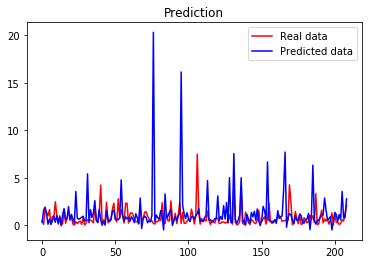

In [13]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

cite: https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression

In [14]:
#Why are my errors all of a sudden so because of overfitting?
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9652919475815259
Mean Squared Error: 5.037153464082974
Root Mean Squared Error: 2.244360368586777


In [15]:
import kerastuner
from kerastuner import HyperModel

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=32, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid']),#,'softmax']),
        input_dim = 40
        )
             
    )

    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=32, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid'])#,'softmax'])
        )
             
    )
    
    model.add(
        keras.layers.Dropout(
            hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    step=0.01)
        )
    )

    # Adding the output layer
    model.add(Dense(units = 1))


    model.compile(
        optimizer='adam',
        #optimizer = hp.Choice('dense_optimizer',
                #values=['adam','SGD','rmsprop','adadelta'] ),
        loss = 'mse',
        metrics = ['mse']
    )
    return model

In [16]:
tuner_rs = kerastuner.tuners.RandomSearch(
            build_model,
            objective='mse',
            max_trials=100,
            executions_per_trial=2, overwrite=True)

In [17]:
tuner_rs.search(X_train, y_train, epochs=10) #, verbose=0)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
units             |8                 |?                 
dense_activation  |tanh              |?                 
dropout           |0.02              |?                 

Epoch 1/10


ValueError: in user code:

    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 40 but received input with shape (None, 45)


In [ ]:
#best_model = tuner_rs.get_best_models(num_models=1)
best_model = tuner_rs.get_best_models(num_models=1)[0]
mse_rs = best_model.evaluate(X_test, y_test)[1]

In [ ]:
loss, mse = best_model.evaluate(X_test, y_test)

In [ ]:
tuner_rs.results_summary()